# 50 Startups regression

In [1]:
# wczytanie danych
import pandas as pd
import matplotlib.pyplot as plt

#### Read data

In [2]:
df = pd.read_csv('Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Null values

In [3]:
print("Check null values : ")
pd.DataFrame(df.isnull().sum()).T

Check null values : 


,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,0,0,0,0


#### Corelation Matrix

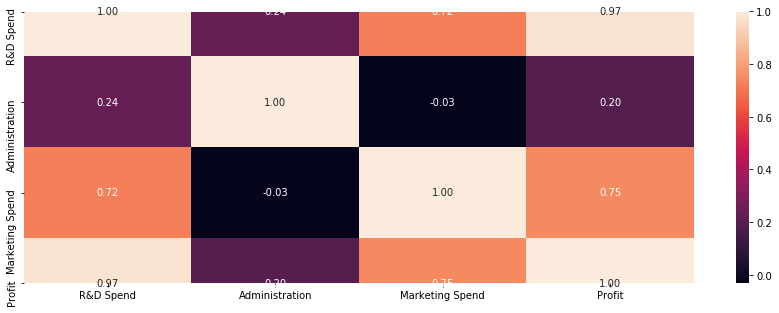

In [4]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

Wnioski :
* Wartośc ostatecznego profitu jest wysoko skorelowana z wydatkami na dział R&D oraz marketingu w związku z czym należy o te działy dbać :)
* Lokalizacja danego oddziału nie ma przełożenia na wyniki finansowe

#### One-hot encoding

In [95]:
# Obsługa dummy variables
dummies=pd.get_dummies(df.State)
print("One hot endkodowane dane")
dummies.head()

One hot endkodowane dane


,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [96]:
# Dodajemy dane z one hot encode
df=pd.concat([df,dummies],axis='columns')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


#### Avoid dummy variable trap

In [97]:
# Pozbywamy się kolumny state i unikamy dummy variable trap poprzez usunięcie New York
# Jeżeli state nie jest w Californi ani w Florydzie to jest w Nowym Yorku 
df.drop(columns=["State","New York"],inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


#### Train-test split

In [204]:
# podział na dane treningowe i testowe
# jak robisz podział na features/labels to sprowadzaj to już do numpy
from sklearn.model_selection import train_test_split
X_startups = df[["R&D Spend","Administration","Marketing Spend","California","Florida"]].values
y_startups = df[["Profit"]].values
X_train, X_test, y_train, y_test = train_test_split(X_startups, y_startups, random_state=1)

#### Lnear Model

In [205]:
# przygotowanie modelu
from sklearn.linear_model import LinearRegression
regr = LinearRegression(normalize=True) # modele liniowe(regresje liniowe,KNN, sieci neuronowe itd..) trzeba normalizować

In [206]:
# trenowanie modelu
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [207]:
# predykcja na danych testowych
y_pred = regr.predict(X_test)

#### Results

In [214]:
# wynik
from sklearn.metrics import mean_squared_error
print("Współczynnik: ", regr.coef_)
print("Wyraz wspólny: ", regr.intercept_)
print("Błąd średniokwadratowy: %.2f" % mean_squared_error(y_test, y_pred))
print("Współczynnik determinacji R^2: %.2f" % regr.score(X_train, y_train) )

Współczynnik:  [[ 7.61639095e-01 -1.13592334e-03  3.35038917e-02 -8.49007841e+02
  -5.83502287e+02]]
Wyraz wspólny:  [49654.85039051]
Błąd średniokwadratowy: 68771246.80
Współczynnik determinacji R^2: 0.94


In [215]:
reg_score = regr.score(X_train,y_train)
reg_score

0.9419546147365754

#### Data Visualization

In [216]:
df_test = pd.DataFrame()
df_test["prediction"] = y_pred.squeeze() #reduce dim
df_test["real"] = y_test.squeeze() #reduce dim

Fajnie pokazać biznesowi jak to wygląda, bo metryka może mało mówić :)


Text(0, 0.5, 'Value')

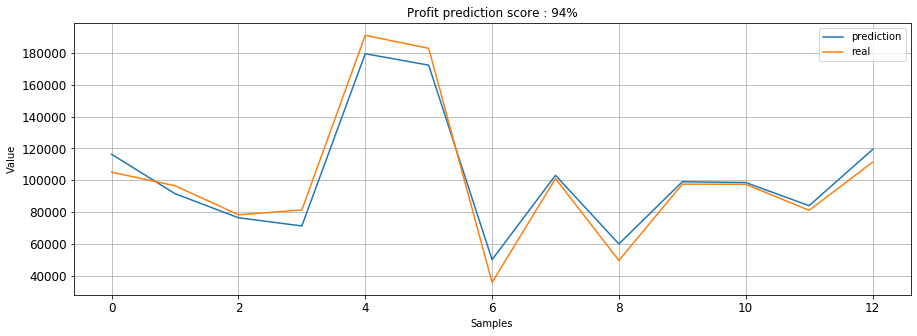

In [217]:
print("Fajnie pokazać biznesowi jak to wygląda, bo metryka może mało mówić :)")
profit_ax = df_test.plot(figsize=(15,5),grid=True,legend=True,title=f"Profit prediction score : {str(reg_score)[2:4]}%",fontsize=12)
profit_ax.set_xlabel("Samples")
profit_ax.set_ylabel("Value")